In [2]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import polyakov
from modules import utility
from modules import fourier_surface
import os
import glob

In [24]:
#df_1 = read_and_write.load_from_folder("./output_measure_surface/su4_44_44_64_6/beta_10.9","polyakov:", "complex")
#df_2 = read_and_write.load_from_folder("./output_measure_surface/su4","PRO 1 Origin polyakov smeared:", "complex")
#df_3 = read_and_write.load_from_folder("./output_measure_surface/su4","PRO 1 Average polyakov smeared:", "complex")
#df_4 = read_and_write.load_from_folder("./output_measure_surface/su6","Min:", "real")
#volume, surface_smooth = read_and_write.read_surface_data("./output_measure_surface/su4_surface_data")
#volume, fourier_profile = read_and_write.read_surface_data("./output_measure_surface/su4_surface_data", "fourier_profile")
#surface_discrete = read_and_write.read_3d_surface("./output_measure_surface/su4_surface_data","surface_discrete")


## Load data

In [10]:
folder_names = ["../data/output-measure-surface/su4-36-36-48-6",
                "../data/output-measure-surface/su4-44-44-64-6/beta-12-twist-2",
                "../data/output-measure-surface/su4-44-44-64-6/beta-10.9-twist-2",
                "../data/output-measure-surface/su4-44-44-64-6/beta-10.85-twist-1",
                "../data/output-measure-surface/su4-44-44-64-6/beta-10.85-twist-2"]
smooth_surfaces= {}
choose_folder = 5
folder = folder_names[choose_folder-1]
files = glob.glob(os.path.join(folder, "surface_smooth_*"))
for file in files:
    file_name = file.split("/")[-1]
    smearing_level = file_name.split("_")[-1]
    volume, surface = read_and_write.read_surface_data(folder, file_name)
    smooth_surfaces[smearing_level] = surface


In [4]:
utility.display_markdown_title(folder)

# $\text{SU}(4)$, $V$ = ['44', '44', '64', '6'], $\beta=$ 10.85, twist coeff $=$ 2

In [ ]:
%matplotlib widget
smearing_level_index = 3
fourier_surface.surface_in_3d(smooth_surfaces[smearing_level_index][69])



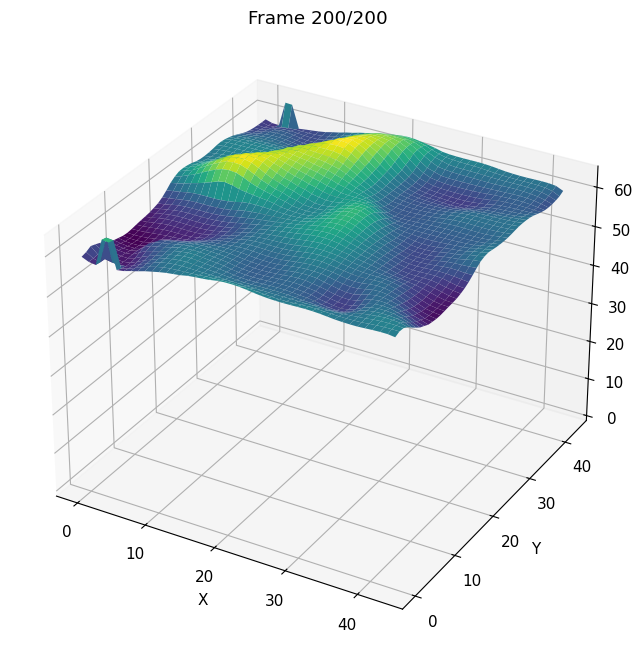

In [11]:
%matplotlib inline
smearing_level = "30"
number_of_frames = 200
file_name = "-".join(folder.split("/")[-2:])
fourier_surface.animate_surface_in_3d(smooth_surfaces[smearing_level][0:number_of_frames],volume,output_file=f"../videos/surfaces/{file_name}-smear-{smearing_level}.mp4",fps=10)


In [ ]:
#print(df_1["10 1"])
#df = df_1["16 1"].drop(columns=['sum']).iloc[990:,:]
df = df_2["16 1"].iloc[:,:]
polyakov.animate_polar(df)
#df

In [ ]:
# def parse_to_complex(tuple_str):
#     real, imag = ast.literal_eval(tuple_str)
#     return complex(real, imag)

# # Use pandas read_csv with a custom converter for the tuples to complex numbers
# file_path = './input.txt'  # Replace with your file path


# with open(file_path, 'r') as file:
#     csv_data = file.read()
    
# df = pd.read_csv(
#     "./input.txt",
#     sep=' ',
#     header=None,
#     names=['Label', 'Something', 'z-index', 'Area average', 'Origin'],
#     converters={'Area average': parse_to_complex, 'Origin': parse_to_complex}
# )
# z_index = df["z-index"].values
# area_average = df["Area average"].values
# origin = df["Origin"].values

#df_yes = df_4["10 1"]["ind"] == 25
df_1 = df_1["13 2"].drop(columns=['sum'])
df_2 = df_2["13 2"]
df_3 = df_3["13 2"]

polyakov_z_index = df_1.iloc[-1].values
origin = df_2.iloc[-1].values
area_average = df_3.iloc[-1].values
z_index = df_3.columns
#polar_plot(area_average,z_index,title="Average z-index smeared")
#polar_plot(origin,z_index,title="z-index origin smeared")
#polar_plot(polyakov_z_index,z_index,title="Average z-index")
polyakov.create_figure_polar_zindex(df_1)
